## 기본설정

In [2]:
import os
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import shutil

In [8]:
from matplotlib import font_manager, rc
rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

In [3]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## 간단한 EDA

In [4]:
df = pd.read_csv("smartphone/mobile_data_img.csv")

In [14]:
df.shape

(10200, 5)

In [5]:
df.Model.nunique()

462

In [6]:
df.Model.value_counts()

iPhone 7         771
iPhone 7 Plus    532
Other model      510
iPhone 6S        465
iPhone X         273
                ... 
Nexus 6P           1
Mi 8 lite          1
Stylo              1
Bolt               1
7 Plus             1
Name: Model, Length: 462, dtype: int64

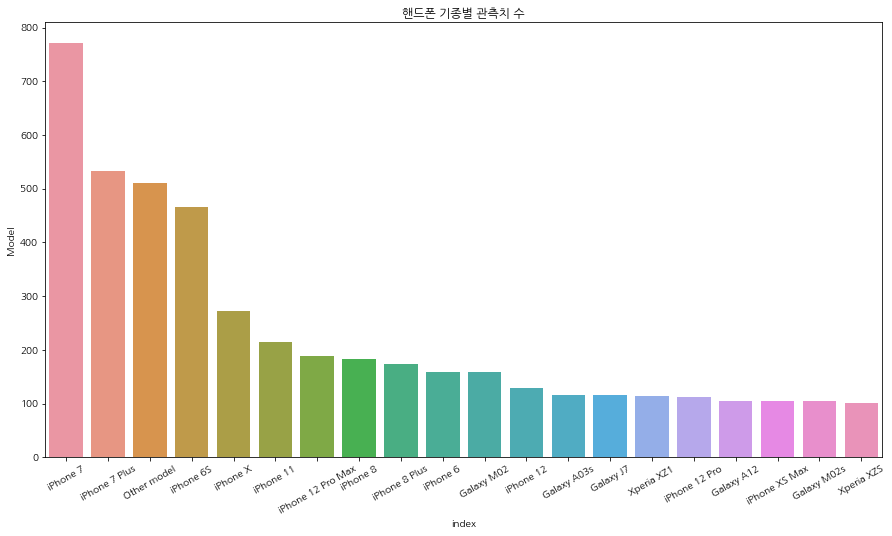

In [13]:
plt.figure(figsize = (15,8))
ax = sns.barplot(data=df['Model'].value_counts().head(20).to_frame().reset_index(), x='index', y='Model')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
plt.title("핸드폰 기종별 관측치 수")
plt.show()

In [10]:
df.Brand.nunique()

32

In [11]:
df.Brand.value_counts()

Apple            4064
Samsung          2617
Xiaomi            788
Huawei            718
Sony              525
Nokia             310
Oppo              298
Vivo              208
LG                136
OnePlus           124
Realme            111
Other brand        98
Infinix            40
Google             31
ZTE                29
Asus               19
HTC                14
E-tel              14
Greentel           12
Lenovo              9
Dialog              5
Moto                5
Sony Ericsson       5
Acer                4
China Mobile        3
BlackBerry          3
Micromax            3
Alcatel             2
Ag-tel              2
iPro                1
Zigo                1
Microsoft           1
Name: Brand, dtype: int64

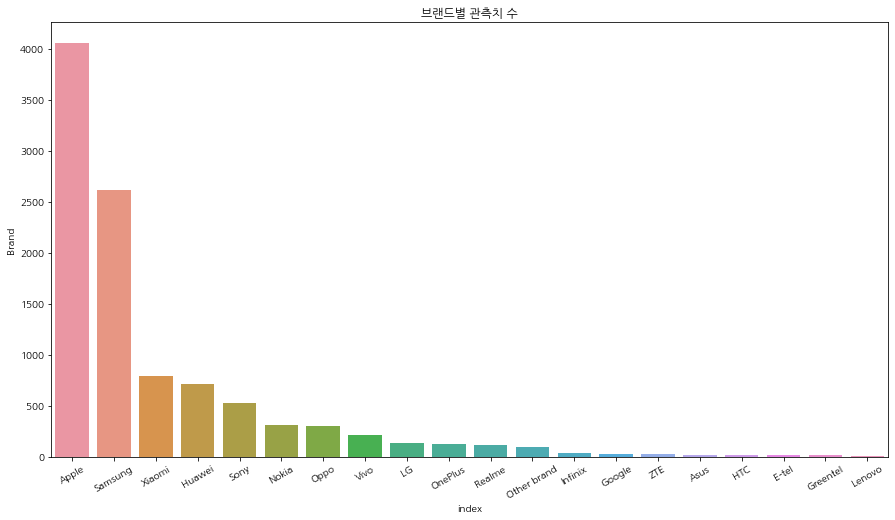

In [12]:
plt.figure(figsize = (15,8))
ax = sns.barplot(data=df['Brand'].value_counts().head(20).to_frame().reset_index(), x='index', y='Brand')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
plt.title('브랜드별 관측치 수')
plt.show()

In [9]:
df_AS = df[df['Brand'].isin(['Apple', 'Samsung'])]

In [10]:
df_AS.head()

Label       Model    Brand  \
0                apple iphone 7 portroid (used)     iPhone 7    Apple   
1                  apple iphone 6s 128gb (used)    iPhone 6S    Apple   
2                     samsung galaxy m02 (used)   Galaxy M02  Samsung   
4                   apple iphone 7 128gb (used)     iPhone 7    Apple   
5  samsung galaxy m02 2gb ram/32gb memory (new)   Galaxy M02  Samsung   

  Condition                                         Image_File  
0      Used  mobile_images/1635051927882_Apple iPhone 7 Por...  
1      Used  mobile_images/1635051928230_Apple iPhone 6S 12...  
2      Used  mobile_images/1635051928415_Samsung Galaxy M02...  
4      Used  mobile_images/1635051928818_Apple iPhone 7 128...  
5       New  mobile_images/1635051929034_Samsung Galaxy M02...

In [11]:
df_AS.shape

(6681, 5)

### 폴더 생성

In [12]:
dir_path = "smartphone/mobile_images/mobile_images/"

all_path = []
for (root, directories, files) in os.walk(dir_path):
    for file in files:
        all_path.append('mobile_images/' + file)

In [13]:
all_path

['mobile_images/1635051927882_Apple iPhone 7 Portroid Used for sale.jpg',
 'mobile_images/1635051928230_Apple iPhone 6S 128GB Used for sale.jpg',
 'mobile_images/1635051928415_Samsung Galaxy M02 Used for sale.jpg',
 'mobile_images/1635051928611_LG Q92 5G Black Snapdragon New for sale.jpg',
 'mobile_images/1635051928818_Apple iPhone 7 128GB Used for sale.jpg',
 'mobile_images/1635051929034_Samsung Galaxy M02 2GB Ram32GB memory New for sale.jpg',
 'mobile_images/1635051929290_Apple iPhone 7 32GB Used for sale.jpg',
 'mobile_images/1635051929498_Samsung Galaxy J2 Used for sale.jpg',
 'mobile_images/1635051929715_Apple iPhone 7 Plus 128GB  Black Used for sale.jpg',
 'mobile_images/1635051929922_Huawei Nova 7i 8GB  128 GB Used for sale.jpg',
 'mobile_images/1635051930132_Xiaomi Redmi Note 9 Pro Used for sale.jpg',
 'mobile_images/1635051930337_Samsung Galaxy M11 Used for sale.jpg',
 'mobile_images/1635051930520_Samsung Galaxy A50 4GB64GB Used for sale.jpg',
 'mobile_images/1635051930743_App

In [14]:
df_AS = df_AS[df_AS.Image_File.isin(all_path)]

In [15]:
df_AS.shape

(6663, 5)

In [16]:
labels = df_AS.sort_values('Brand')
class_names = list(labels.Brand.unique())

In [18]:
#creating subfolders
for i in class_names:
    os.makedirs(os.path.join('Apple_Samsung', i))

In [23]:
labels

Label                Model    Brand  \
0           apple iphone 7 portroid (used)              iPhone 7    Apple   
5756          apple iphone x 256 gb (used)              iPhone X    Apple   
5754            apple iphone 8 64gb (used)              iPhone 8    Apple   
5752           apple iphone x 256gb (used)              iPhone X    Apple   
5747          apple iphone 11 128 gb (new)             iPhone 11    Apple   
...                                     ...                  ...      ...   
6433    samsung galaxy note 10 plus (used)   Galaxy Note 10 Plus  Samsung   
6435         samsung galaxy a7 2018 (used)             Galaxy A7  Samsung   
2192            samsung galaxy a10s (used)           Galaxy A10s  Samsung   
2182   samsung galaxy s20 8gb 128gb (used)            Galaxy S20  Samsung   
10199             samsung galaxy s9 (used)             Galaxy S9  Samsung   

      Condition                                         Image_File  
0          Used  mobile_images/1635051927882_Apple iPhone 7 Por...  
5756       Used  mobile_images/1635064395153_Apple iPhone X 256...  
5754       Used  mobile_images/1635064394760_Apple iPhone 8 64g...  
5752       Used  mobile_images/1635064394286_Apple iPhone X 256...  
5747        New  mobile_images/1635064392866_Apple iPhone 11 12...  
...         ...                                                ...  
6433       Used  mobile_images/1635068955350_Samsung Galaxy Not...  
6435       Used  mobile_images/1635068955889_Samsung Galaxy A7 ...  
2192       Used  mobile_images/1635055225657_Samsung Galaxy A10...  
2182       Used  mobile_images/1635055223637_Samsung Galaxy S20...  
10199      Used  mobile_images/1635151377938_Samsung Galaxy S9 ...  

[6663 rows x 5 columns]

In [29]:
path = 'C:/Users/kkang/Desktop/자분특/자분특 기말 프로젝트/딥러닝/smartphone/mobile_images/'

#moving the image files to their respective categories
for c in class_names: # Category Name
    for i in list(labels[labels['Brand']==c]['Image_File']): # Image Id
        get_image = os.path.join(path, i) # Path to Images 
        move_image_to_cat = shutil.move(get_image, 'Apple_Samsung/'+c)

In [39]:
#pip install split-folders

Note: you may need to restart the kernel to use updated packages.


In [73]:
input_folder = 'Apple_Samsung'
ouput_folder = 'data_for_cnn'

In [74]:
import splitfolders
splitfolders.ratio(input_folder, output=ouput_folder, seed=1337, ratio=(0.7, 0.15, 0.15))

Copying files: 6663 files [00:24, 274.77 files/s]


## ver 1-1. 간단한 합성망 인풋 shape 150

In [16]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
 input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [5]:
from tensorflow.keras import optimizers
model.compile(loss='binary_crossentropy',
 optimizer=optimizers.RMSprop(lr=1e-4),
 metrics=['acc'])

C:\Users\kkang\anaconda3\lib\site-packages\keras\optimizer_v2\rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [31]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [7]:
train_dir = 'C:/Users/kkang/Desktop/자분특/자분특 기말 프로젝트/딥러닝/data_for_cnn/train'
validation_dir = 'C:/Users/kkang/Desktop/자분특/자분특 기말 프로젝트/딥러닝/data_for_cnn/val'
test_dir = 'C:/Users/kkang/Desktop/자분특/자분특 기말 프로젝트/딥러닝/data_for_cnn/test'

In [8]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 4663 images belonging to 2 classes.


In [9]:
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 999 images belonging to 2 classes.


In [10]:
for data_batch, labels_batch in train_generator:
    print(data_batch.shape)
    print(labels_batch.shape)
    break

(20, 150, 150, 3)
(20,)


In [11]:
history = model.fit_generator(
 train_generator,
 steps_per_epoch=100,
 epochs=30,
 validation_data=validation_generator,
 validation_steps=50)

<ipython-input-11-01e87ebf5992>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/30
100/100 [==============================] - 25s 249ms/step - loss: 0.6471 - acc: 0.6285 - val_loss: 0.6071 - val_acc: 0.6757
Epoch 2/30
100/100 [==============================] - 26s 260ms/step - loss: 0.6130 - acc: 0.6606 - val_loss: 0.6050 - val_acc: 0.7017
Epoch 3/30
100/100 [==============================] - 29s 291ms/step - loss: 0.5852 - acc: 0.6904 - val_loss: 0.5679 - val_acc: 0.6917
Epoch 4/30
100/100 [==============================] - 28s 282ms/step - loss: 0.5857 - acc: 0.6964 - val_loss: 0.5550 - val_acc: 0.7047
Epoch 5/30
100/100 [==============================] - 29s 290ms/step - loss: 0.5680 - acc: 0.7035 - val_loss: 0.5449 - val_acc: 0.7037
Epoch 6/30
100/100 [==============================] - 28s 278ms/step - loss: 0.5555 - acc: 0.7070 - val_loss: 0.5434 - val_acc: 0.7147
Epoch 7/30
100/100 [==============================] - 28s 283ms/step - loss: 0.5497 - acc: 0.7115 - val_loss: 0.5309 - val_acc: 0.7197
Epoch 8/30
100/100 [==============================] - 2

In [12]:
model.save('smartphone_small_1.h5')

In [13]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

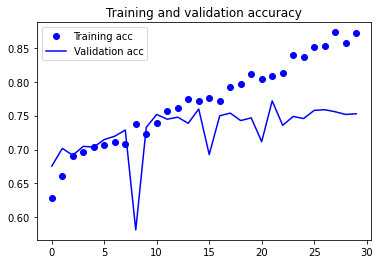

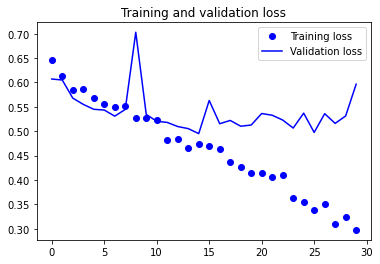

In [14]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [15]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 1001 images belonging to 2 classes.


In [16]:
test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

<ipython-input-16-a056cf674a87>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)


test acc: 0.7300000190734863


## ver 1-2. 간단한 합성망 인풋 shape 255

In [117]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
 input_shape=(255, 255, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_46 (Conv2D)          (None, 253, 253, 32)      896       
                                                                 
 max_pooling2d_46 (MaxPoolin  (None, 126, 126, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_47 (Conv2D)          (None, 124, 124, 64)      18496     
                                                                 
 max_pooling2d_47 (MaxPoolin  (None, 62, 62, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_48 (Conv2D)          (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_48 (MaxPoolin  (None, 30, 30, 128)    

In [118]:
from tensorflow.keras import optimizers
model.compile(loss='binary_crossentropy',
 optimizer=optimizers.RMSprop(lr=1e-4),
 metrics=['acc'])

In [119]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [11]:
train_dir = 'C:/Users/kkang/Desktop/자분특/자분특 기말 프로젝트/딥러닝/data_for_cnn/train'
validation_dir = 'C:/Users/kkang/Desktop/자분특/자분특 기말 프로젝트/딥러닝/data_for_cnn/val'
test_dir = 'C:/Users/kkang/Desktop/자분특/자분특 기말 프로젝트/딥러닝/data_for_cnn/test'

In [121]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(255, 255),
    batch_size=20,
    class_mode='binary')

Found 4663 images belonging to 2 classes.


In [122]:
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(255, 255),
    batch_size=20,
    class_mode='binary')

Found 999 images belonging to 2 classes.


In [123]:
for data_batch, labels_batch in train_generator:
    print(data_batch.shape)
    print(labels_batch.shape)
    break

(20, 255, 255, 3)
(20,)


In [124]:
history = model.fit_generator(
 train_generator,
 steps_per_epoch=100,
 epochs=30,
 validation_data=validation_generator,
 validation_steps=50)

<ipython-input-124-01e87ebf5992>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/30
100/100 [==============================] - 83s 830ms/step - loss: 0.6364 - acc: 0.6409 - val_loss: 0.5919 - val_acc: 0.7057
Epoch 2/30
100/100 [==============================] - 90s 897ms/step - loss: 0.5969 - acc: 0.6790 - val_loss: 0.5848 - val_acc: 0.7097
Epoch 3/30
100/100 [==============================] - 95s 956ms/step - loss: 0.5720 - acc: 0.6974 - val_loss: 0.5409 - val_acc: 0.7227
Epoch 4/30
100/100 [==============================] - 104s 1s/step - loss: 0.5516 - acc: 0.7100 - val_loss: 0.5324 - val_acc: 0.7277
Epoch 5/30
100/100 [==============================] - 105s 1s/step - loss: 0.5401 - acc: 0.7305 - val_loss: 0.5484 - val_acc: 0.7247
Epoch 6/30
100/100 [==============================] - 115s 1s/step - loss: 0.5061 - acc: 0.7398 - val_loss: 0.5294 - val_acc: 0.7307
Epoch 7/30
100/100 [==============================] - 115s 1s/step - loss: 0.5229 - acc: 0.7320 - val_loss: 0.5219 - val_acc: 0.7367
Epoch 8/30
100/100 [==============================] - 116s 1s/s

In [125]:
model.save('smartphone_255_1.h5')

In [126]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

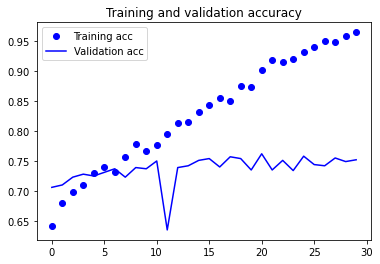

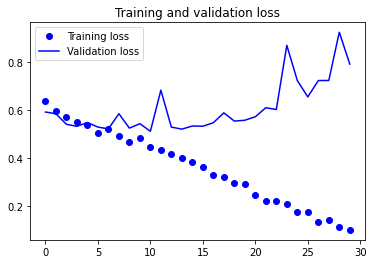

In [127]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [130]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(255, 255),
    batch_size=20,
    class_mode='binary')

Found 1001 images belonging to 2 classes.


In [131]:
test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

<ipython-input-131-a056cf674a87>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)


test acc: 0.7360000014305115


In [13]:
from tensorflow.keras.models import load_model
model = load_model('smartphone_255_1.h5')
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_46 (Conv2D)          (None, 253, 253, 32)      896       
                                                                 
 max_pooling2d_46 (MaxPoolin  (None, 126, 126, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_47 (Conv2D)          (None, 124, 124, 64)      18496     
                                                                 
 max_pooling2d_47 (MaxPoolin  (None, 62, 62, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_48 (Conv2D)          (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_48 (MaxPoolin  (None, 30, 30, 128)    

In [17]:
img_path = 'data_for_cnn/test/Samsung/1635052661450_Samsung Galaxy A20 332 Gb Used for sale.jpg'
# 이미지를 4D 텐서로 변경합니다
from tensorflow.keras.preprocessing import image
import numpy as np

img = image.load_img(img_path, target_size=(255,255)) 
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)

# 모델이 훈련될 때 입력에 적용한 전처리 방식을 동일하게 사용합니다 
img_tensor /= 255.
# 이미지 텐서의 크기는 (1, 150, 150, 3)입니다 
print(img_tensor.shape)

(1, 255, 255, 3)


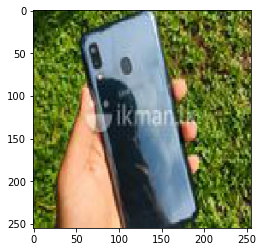

In [18]:
import matplotlib.pyplot as plt
plt.imshow(img_tensor[0])
plt.show()

(1, 253, 253, 32)


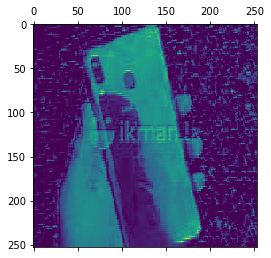

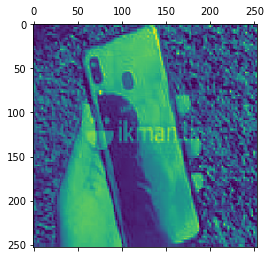

In [19]:
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(img_tensor)

first_layer_activation = activations[0]
print(first_layer_activation.shape)

plt.matshow(first_layer_activation[0, :, :, 1], cmap='viridis')
plt.show()

plt.matshow(first_layer_activation[0, :, :, 15], cmap='viridis')
plt.show()

<ipython-input-20-a641da80afef>:26: RuntimeWarning: invalid value encountered in true_divide
  channel_image /= channel_image.std()


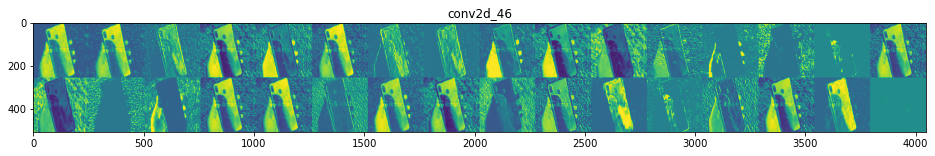

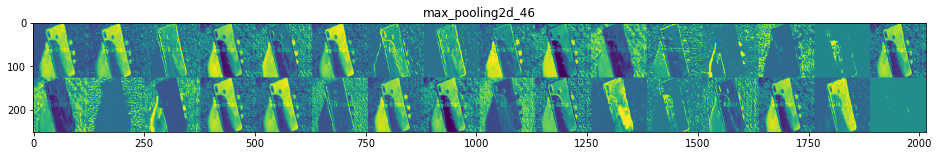

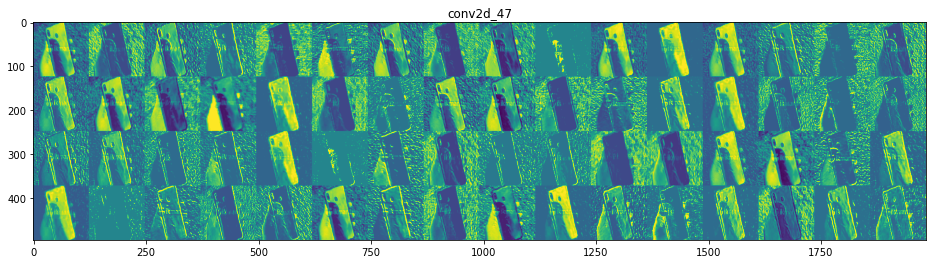

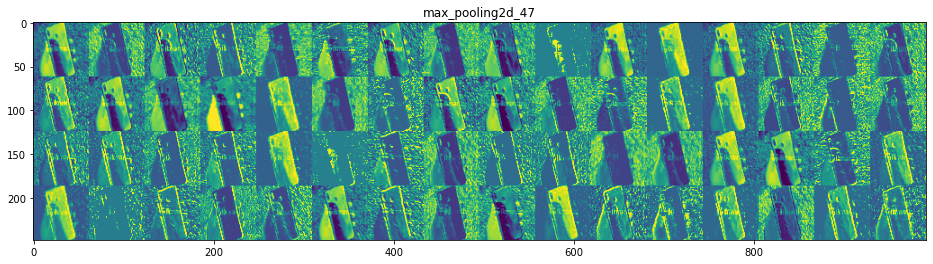

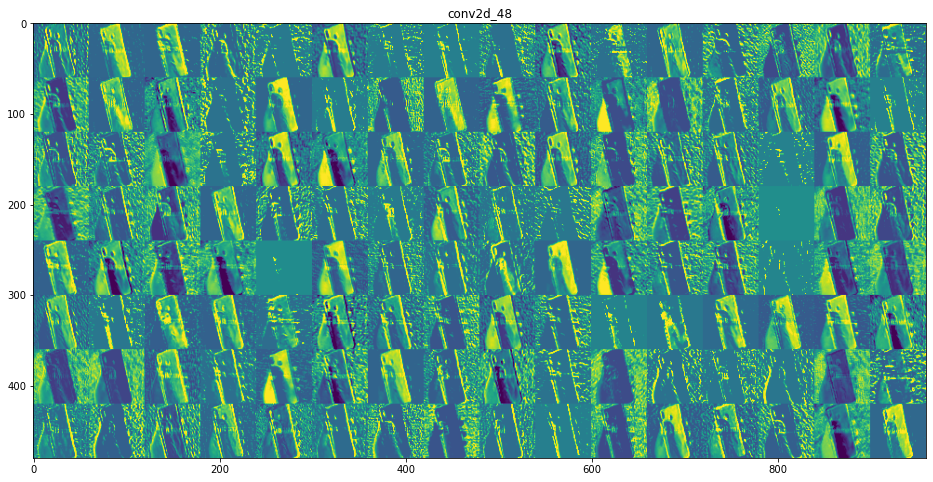

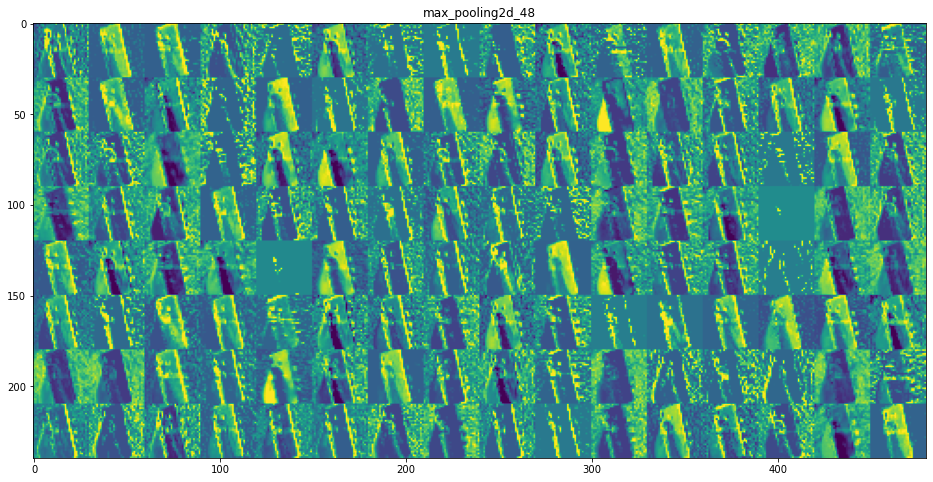

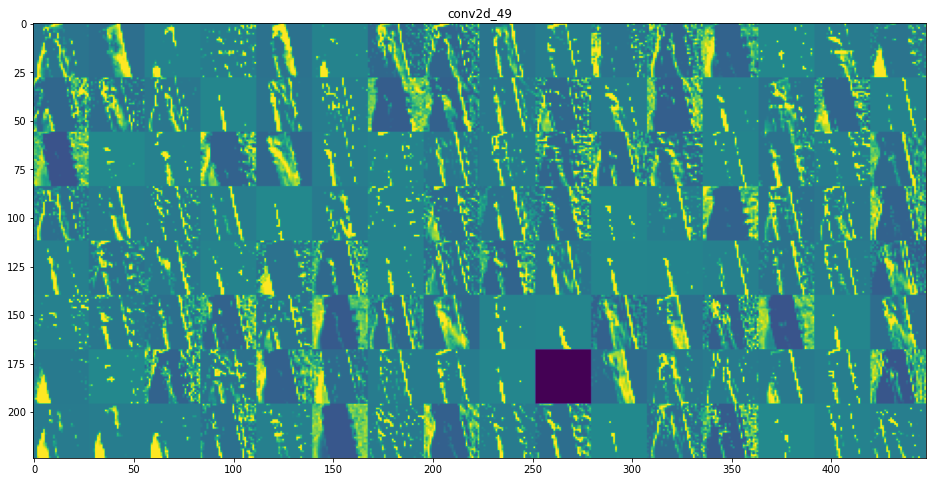

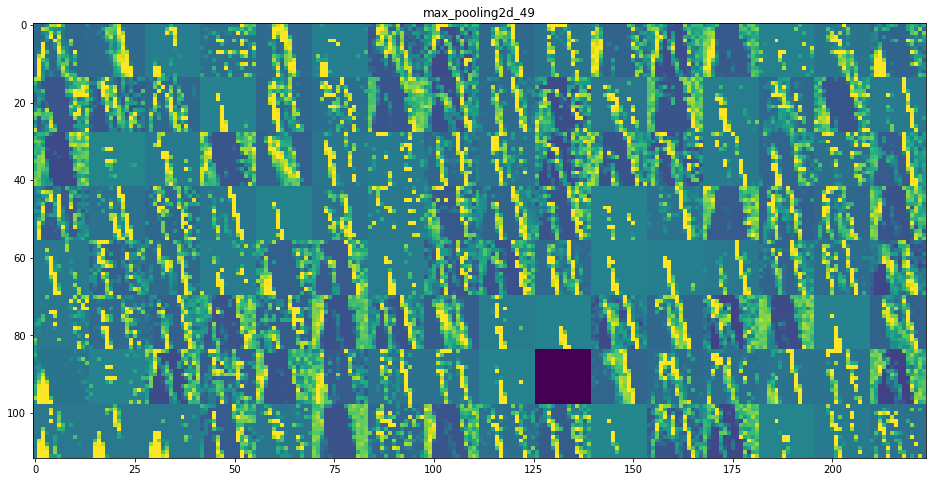

In [20]:
layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)

images_per_row = 16

# 특성 맵을 그립니다
for layer_name, layer_activation in zip(layer_names, activations):
    # 특성 맵에 있는 특성의 수
    n_features = layer_activation.shape[-1]
    
    # 특성 맵의 크기는 (1, size, size, n_features)입니다 
    size = layer_activation.shape[1]
    
    # 활성화 채널을 위한 그리드 크기를 구합니다 
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size)) 
    
    # 각 활성화를 하나의 큰 그리드에 채웁니다
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0, :, :, col * images_per_row + row] 
            
            # 그래프로 나타내기 좋게 특성을 처리합니다
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std() 
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8') 
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image
            
    # 그리드를 출력합니다
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
plt.show()

### ver 2. + 이미지 보강

In [7]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
 input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [8]:
from tensorflow.keras import optimizers
model.compile(loss='binary_crossentropy',
 optimizer=optimizers.RMSprop(lr=1e-4),
 metrics=['acc'])

C:\Users\kkang\anaconda3\lib\site-packages\keras\optimizer_v2\rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True, fill_mode = 'nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

In [12]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

validation_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 4663 images belonging to 2 classes.
Found 999 images belonging to 2 classes.


In [13]:
for data_batch, labels_batch in train_generator:
    print(data_batch.shape)
    print(labels_batch.shape)
    break

(20, 150, 150, 3)
(20,)


In [14]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)

<ipython-input-14-76dc69394845>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/30
100/100 [==============================] - 75s 719ms/step - loss: 0.6633 - acc: 0.6046 - val_loss: 0.6308 - val_acc: 0.6767
Epoch 2/30
100/100 [==============================] - 73s 733ms/step - loss: 0.6319 - acc: 0.6404 - val_loss: 0.6088 - val_acc: 0.6617
Epoch 3/30
100/100 [==============================] - 73s 729ms/step - loss: 0.6147 - acc: 0.6636 - val_loss: 0.5909 - val_acc: 0.6667
Epoch 4/30
100/100 [==============================] - 73s 726ms/step - loss: 0.6168 - acc: 0.6565 - val_loss: 0.5937 - val_acc: 0.6987
Epoch 5/30
100/100 [==============================] - 71s 711ms/step - loss: 0.6012 - acc: 0.6670 - val_loss: 0.6393 - val_acc: 0.6757
Epoch 6/30
100/100 [==============================] - 71s 712ms/step - loss: 0.6059 - acc: 0.6700 - val_loss: 0.5746 - val_acc: 0.6867
Epoch 7/30
100/100 [==============================] - 71s 703ms/step - loss: 0.5874 - acc: 0.6843 - val_loss: 0.5635 - val_acc: 0.6957
Epoch 8/30
100/100 [==============================] - 7

In [15]:
model.save('smartphone_augment_1.h5')

In [16]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

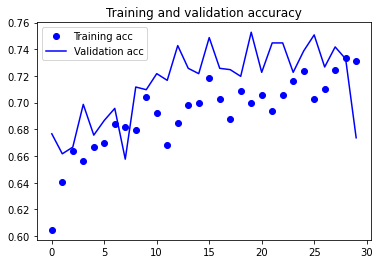

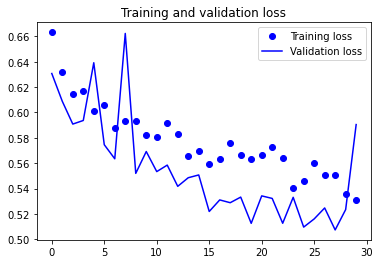

In [17]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [20]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 1001 images belonging to 2 classes.


In [21]:
test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

<ipython-input-21-a056cf674a87>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)


test acc: 0.6650000214576721


## ver 3. 사전학습망 VGG 이용

In [96]:
from tensorflow.keras.applications import VGG16
conv_base = VGG16(weights='imagenet',
    include_top=False,
    input_shape=(150, 150, 3))
conv_base.summary()

58900480/58889256 [==============================] - 17s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                             

In [97]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_10 (Flatten)        (None, 8192)              0         
                                                                 
 dense_20 (Dense)            (None, 256)               2097408   
                                                                 
 dense_21 (Dense)            (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [98]:
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [99]:
train_dir = 'C:/Users/kkang/Desktop/자분특/자분특 기말 프로젝트/딥러닝/data_for_cnn/train'
validation_dir = 'C:/Users/kkang/Desktop/자분특/자분특 기말 프로젝트/딥러닝/data_for_cnn/val'
test_dir = 'C:/Users/kkang/Desktop/자분특/자분특 기말 프로젝트/딥러닝/data_for_cnn/test'

In [100]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 4663 images belonging to 2 classes.
Found 999 images belonging to 2 classes.


In [102]:
model.compile(loss='binary_crossentropy',
    optimizer=optimizers.RMSprop(lr=1e-5),
    metrics=['acc'])

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)

<ipython-input-102-f7b8fc16a81c>:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/30
100/100 [==============================] - 350s 3s/step - loss: 0.6451 - acc: 0.6137 - val_loss: 0.5833 - val_acc: 0.6897
Epoch 2/30
100/100 [==============================] - 352s 4s/step - loss: 0.5761 - acc: 0.7010 - val_loss: 0.5652 - val_acc: 0.7097
Epoch 3/30
100/100 [==============================] - 356s 4s/step - loss: 0.5180 - acc: 0.7332 - val_loss: 0.4963 - val_acc: 0.7578
Epoch 4/30
100/100 [==============================] - 315s 3s/step - loss: 0.5012 - acc: 0.7460 - val_loss: 0.4608 - val_acc: 0.7778
Epoch 5/30
100/100 [==============================] - 175s 2s/step - loss: 0.4580 - acc: 0.7755 - val_loss: 0.4417 - val_acc: 0.7928
Epoch 6/30
100/100 [==============================] - 196s 2s/step - loss: 0.4664 - acc: 0.7660 - val_loss: 0.4722 - val_acc: 0.7708
Epoch 7/30
100/100 [==============================] - 227s 2s/step - loss: 0.4305 - acc: 0.7905 - val_loss: 0.4311 - val_acc: 0.7878
Epoch 8/30
100/100 [==============================] - 245s 2s/step - 

In [103]:
model.save('cats_and_dogs_vgg_1.h5')

In [104]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

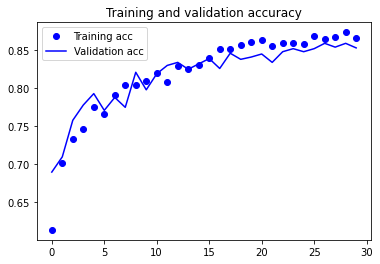

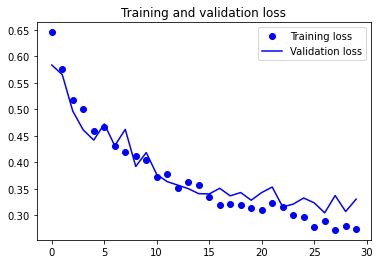

In [105]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [106]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 1001 images belonging to 2 classes.


In [107]:
test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

<ipython-input-107-a056cf674a87>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)


test acc: 0.8510000109672546


In [17]:
from tensorflow.keras.models import load_model
model = load_model('cats_and_dogs_vgg_1.h5')
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_10 (Flatten)        (None, 8192)              0         
                                                                 
 dense_20 (Dense)            (None, 256)               2097408   
                                                                 
 dense_21 (Dense)            (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 9,177,089
Non-trainable params: 7,635,264
_________________________________________________________________


## ver 4-1. 사전학습망 이용 - 255 층

In [132]:
from tensorflow.keras.applications import VGG16
conv_base = VGG16(weights='imagenet',
    include_top=False,
    input_shape=(255, 255, 3))
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 255, 255, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 255, 255, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 255, 255, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 127, 127, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 127, 127, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 127, 127, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 63, 63, 128)       0     

In [133]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_13 (Flatten)        (None, 25088)             0         
                                                                 
 dense_26 (Dense)            (None, 256)               6422784   
                                                                 
 dense_27 (Dense)            (None, 1)                 257       
                                                                 
Total params: 21,137,729
Trainable params: 21,137,729
Non-trainable params: 0
_________________________________________________________________


In [134]:
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [135]:
train_dir = 'C:/Users/kkang/Desktop/자분특/자분특 기말 프로젝트/딥러닝/data_for_cnn/train'
validation_dir = 'C:/Users/kkang/Desktop/자분특/자분특 기말 프로젝트/딥러닝/data_for_cnn/val'
test_dir = 'C:/Users/kkang/Desktop/자분특/자분특 기말 프로젝트/딥러닝/data_for_cnn/test'

In [136]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(255, 255),
    batch_size=20,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(255, 255),
    batch_size=20,
    class_mode='binary')

Found 4663 images belonging to 2 classes.
Found 999 images belonging to 2 classes.


In [137]:
model.compile(loss='binary_crossentropy',
    optimizer=optimizers.RMSprop(lr=1e-5),
    metrics=['acc'])

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)

<ipython-input-137-f7b8fc16a81c>:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/30
100/100 [==============================] - 530s 5s/step - loss: 0.6111 - acc: 0.6595 - val_loss: 0.5315 - val_acc: 0.7277
Epoch 2/30
100/100 [==============================] - 659s 7s/step - loss: 0.4934 - acc: 0.7605 - val_loss: 0.4687 - val_acc: 0.7578
Epoch 3/30
100/100 [==============================] - 628s 6s/step - loss: 0.4066 - acc: 0.8079 - val_loss: 0.4265 - val_acc: 0.7898
Epoch 4/30
100/100 [==============================] - 631s 6s/step - loss: 0.3538 - acc: 0.8405 - val_loss: 0.3957 - val_acc: 0.8088
Epoch 5/30
100/100 [==============================] - 633s 6s/step - loss: 0.2892 - acc: 0.8850 - val_loss: 0.4105 - val_acc: 0.7968
Epoch 6/30
100/100 [==============================] - 975s 10s/step - loss: 0.2505 - acc: 0.8991 - val_loss: 0.3619 - val_acc: 0.8088
Epoch 7/30
100/100 [==============================] - 1056s 11s/step - loss: 0.2230 - acc: 0.9125 - val_loss: 0.3661 - val_acc: 0.8338
Epoch 8/30
100/100 [==============================] - 1102s 11s/st

In [138]:
model.save('cats_and_dogs_vgg_2.h5')

In [139]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

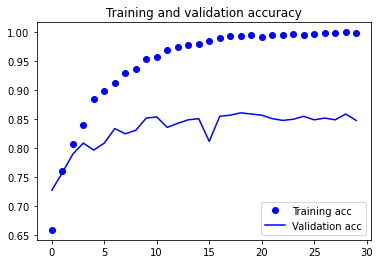

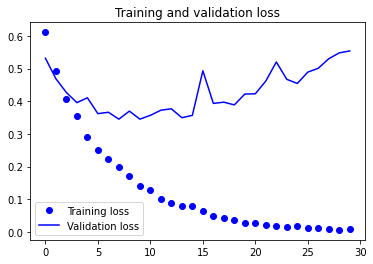

In [140]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [141]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(255, 255),
    batch_size=20,
    class_mode='binary')

Found 1001 images belonging to 2 classes.


In [142]:
test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

<ipython-input-142-a056cf674a87>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)


test acc: 0.8500000238418579


## ver 4-2. 사전학습망 이용 - 255 층 / 과적합 방지를 위한 드롭아웃

In [40]:
from tensorflow.keras.applications import VGG16
conv_base = VGG16(weights='imagenet',
    include_top=False,
    input_shape=(255, 255, 3))
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 255, 255, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 255, 255, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 255, 255, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 127, 127, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 127, 127, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 127, 127, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 63, 63, 128)       0     

In [41]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_3 (Flatten)         (None, 25088)             0         
                                                                 
 dense_6 (Dense)             (None, 256)               6422784   
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 1)                 257       
                                                                 
Total params: 21,137,729
Trainable params: 21,137,729
Non-trainable params: 0
_________________________________________________________________


In [42]:
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [43]:
train_dir = 'C:/Users/kkang/Desktop/자분특/자분특 기말 프로젝트/딥러닝/data_for_cnn/train'
validation_dir = 'C:/Users/kkang/Desktop/자분특/자분특 기말 프로젝트/딥러닝/data_for_cnn/val'
test_dir = 'C:/Users/kkang/Desktop/자분특/자분특 기말 프로젝트/딥러닝/data_for_cnn/test'

In [44]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(255, 255),
    batch_size=20,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(255, 255),
    batch_size=20,
    class_mode='binary')

Found 4663 images belonging to 2 classes.
Found 999 images belonging to 2 classes.


In [45]:
model.compile(loss='binary_crossentropy',
    optimizer=optimizers.RMSprop(lr=1e-5),
    metrics=['acc'])

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)

<ipython-input-45-f7b8fc16a81c>:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/30
100/100 [==============================] - 976s 10s/step - loss: 0.6732 - acc: 0.6147 - val_loss: 0.5895 - val_acc: 0.6677
Epoch 2/30
100/100 [==============================] - 970s 10s/step - loss: 0.5747 - acc: 0.6920 - val_loss: 0.5124 - val_acc: 0.7427
Epoch 3/30
100/100 [==============================] - 967s 10s/step - loss: 0.4910 - acc: 0.7510 - val_loss: 0.4634 - val_acc: 0.7628
Epoch 4/30
100/100 [==============================] - 964s 10s/step - loss: 0.4330 - acc: 0.7932 - val_loss: 0.4471 - val_acc: 0.7718
Epoch 5/30
100/100 [==============================] - 588s 6s/step - loss: 0.3830 - acc: 0.8275 - val_loss: 0.4147 - val_acc: 0.8018
Epoch 6/30
100/100 [==============================] - 617s 6s/step - loss: 0.3533 - acc: 0.8341 - val_loss: 0.3907 - val_acc: 0.8098
Epoch 7/30
100/100 [==============================] - 638s 6s/step - loss: 0.3128 - acc: 0.8540 - val_loss: 0.3897 - val_acc: 0.8118
Epoch 8/30
100/100 [==============================] - 669s 7s/ste

In [46]:
model.save('cats_and_dogs_vgg_255_dropout.h5')

In [47]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

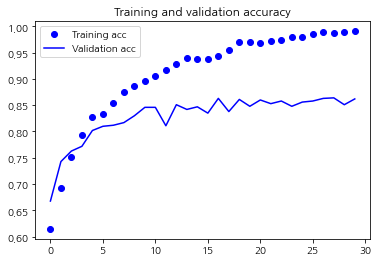

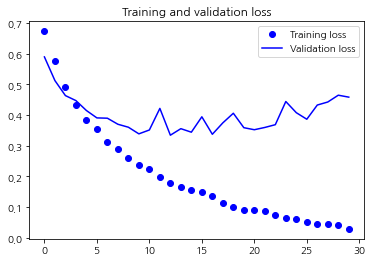

In [48]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [49]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(255, 255),
    batch_size=20,
    class_mode='binary')

Found 1001 images belonging to 2 classes.


In [50]:
test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

<ipython-input-50-a056cf674a87>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)


test acc: 0.8479999899864197


## ver 5. 사전학습망 + data augmentation

In [23]:
from tensorflow.keras.applications import VGG16
conv_base = VGG16(weights='imagenet',
    include_top=False,
    input_shape=(150, 150, 3))
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [24]:
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [25]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_2 (Dense)             (None, 256)               2097408   
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 9,177,089
Non-trainable params: 7,635,264
_________________________________________________________________


In [26]:
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [27]:
train_dir = 'C:/Users/kkang/Desktop/자분특/자분특 기말 프로젝트/딥러닝/data_for_cnn/train'
validation_dir = 'C:/Users/kkang/Desktop/자분특/자분특 기말 프로젝트/딥러닝/data_for_cnn/val'
test_dir = 'C:/Users/kkang/Desktop/자분특/자분특 기말 프로젝트/딥러닝/data_for_cnn/test'

In [28]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True, fill_mode = 'nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

In [29]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 4663 images belonging to 2 classes.
Found 999 images belonging to 2 classes.


In [30]:
model.compile(loss='binary_crossentropy',
    optimizer=optimizers.RMSprop(lr=1e-5),
    metrics=['acc'])

In [31]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)

<ipython-input-31-76dc69394845>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/30
100/100 [==============================] - 360s 4s/step - loss: 0.6340 - acc: 0.6399 - val_loss: 0.5761 - val_acc: 0.6887
Epoch 2/30
100/100 [==============================] - 325s 3s/step - loss: 0.5835 - acc: 0.6775 - val_loss: 0.5187 - val_acc: 0.7427
Epoch 3/30
100/100 [==============================] - 330s 3s/step - loss: 0.5202 - acc: 0.7395 - val_loss: 0.5010 - val_acc: 0.7467
Epoch 4/30
100/100 [==============================] - 210s 2s/step - loss: 0.4854 - acc: 0.7535 - val_loss: 0.4571 - val_acc: 0.7718
Epoch 5/30
100/100 [==============================] - 199s 2s/step - loss: 0.4728 - acc: 0.7579 - val_loss: 0.4436 - val_acc: 0.7708
Epoch 6/30
100/100 [==============================] - 231s 2s/step - loss: 0.4405 - acc: 0.7820 - val_loss: 0.4763 - val_acc: 0.7518
Epoch 7/30
100/100 [==============================] - 244s 2s/step - loss: 0.4247 - acc: 0.7960 - val_loss: 0.4091 - val_acc: 0.7898
Epoch 8/30
100/100 [==============================] - 262s 3s/step - 

In [32]:
model.save('cats_and_dogs_vgg_aug.h5')

In [33]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

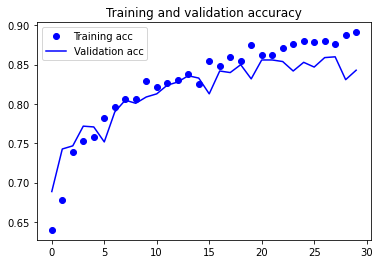

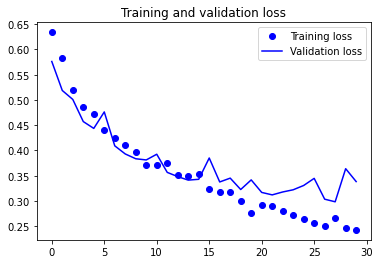

In [34]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [35]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 1001 images belonging to 2 classes.


In [36]:
test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

<ipython-input-36-a056cf674a87>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)


test acc: 0.8420000076293945
